In [86]:
import numpy as np

In [87]:
dia_hebra = 0.27 # mm
# 
F_hebra = 3.241 # kg
F_hebra_kg = F_hebra
F_hebra = 9.81*F_hebra # N
A_hebra = np.pi*(dia_hebra/2)**2
sigma_hebra = F_hebra/A_hebra # MPa

F_trenzado = 172.667 # kg
F_trenzado_kg = F_trenzado
F_trenzado = 9.81*F_trenzado # N
dia_trenzado = 4 # mm

# 4 monofilamentos x 16 + 15 monofilamentos en alma
theta = 85 # grados
ctheta = np.sin(np.deg2rad(theta))
Nalma = 15
Atrenzado = (ctheta*16*4 + Nalma)*np.pi*(dia_hebra/2)**2 
sigma_trenzado = F_trenzado/Atrenzado # MPa

# homogenized 
Atrenzado_homogenized = np.pi*(dia_trenzado/2)**2
sigma_trenzado_homogenized = F_trenzado/Atrenzado_homogenized # MPa
# print with 2 decimals
print(f"sigma_trenzado = {sigma_trenzado:.2f} MPa")
print(f"sigma_hebra = {sigma_hebra:.2f} MPa")
print(f"sigma_trenzado_homogenized = {sigma_trenzado_homogenized:.2f} MPa")
# 
# ratio 
ratio = sigma_trenzado/sigma_hebra
print(f"ratio = {ratio:.3f}")

sigma_trenzado = 375.64 MPa
sigma_hebra = 555.30 MPa
sigma_trenzado_homogenized = 134.79 MPa
ratio = 0.676


In [88]:
from tools.step.runstep import runstep,address,lj
import os


In [89]:
import glob

In [90]:
files = glob.glob('output/*.json')

In [91]:
file = files[-4]

In [92]:
id_sim = os.path.basename(file).replace('.json','')

In [93]:
id_sim


'2024-08-30__22-32-19__65026'

In [94]:
params_sim = lj(id_sim)
params = lj(params_sim["dependencies"]["post_path"])

In [95]:
from matplotlib import pyplot as plt
import numpy as np

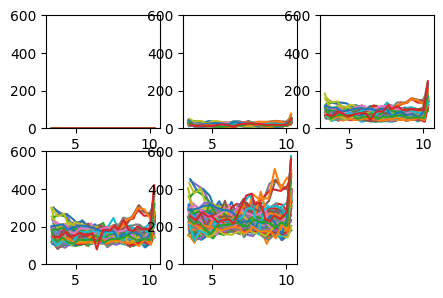

In [96]:

nms = len(params["results"]["measurements"])
nnsqrt_plots = np.ceil(np.sqrt(nms))
# int 
nnsqrt_plots = int(nnsqrt_plots)
fig = plt.figure(figsize=(5, 5))


for i in range(nms):
    plt.subplot(nnsqrt_plots, nnsqrt_plots, i+1)
    mt = params["results"]["measurements"][i]["mt"]
    mt_z = params["results"]["measurements"][i]["mt_z"]
    for imt,imt_z in zip(mt,mt_z):
        plt.plot(imt_z, imt)

    plt.ylim(0,600)

In [97]:
steps = params["results"]["frd"]["steps"]
step_str =  [ i[:7 ] for i in steps ]
step_str = np.array(step_str)    
step_str_uq = np.unique(step_str)

indx = [ np.where(step_str == iuq )[-1][-1] for iuq in step_str_uq]


sigma_max = [i["sigma_max"] for i in params["results"]["measurements"]]
sigma_apl = [i["sigma"] for i in params["results"]["measurements"]]
epsilon = [i["epsilon"] for i in params["results"]["measurements"]]
Ftotal = [i["F_total"] for i in params["results"]["measurements"]]

sigma_max = np.array(sigma_max)
sigma_max = sigma_max[indx]
sigma_apl = np.array(sigma_apl)
sigma_apl = sigma_apl[indx]
epsilon = np.array(epsilon)
epsilon = epsilon[indx]
Ftotal = np.array(Ftotal)/9.81 # kg
Ftotal = Ftotal[indx]

step_str_uq = step_str[indx]

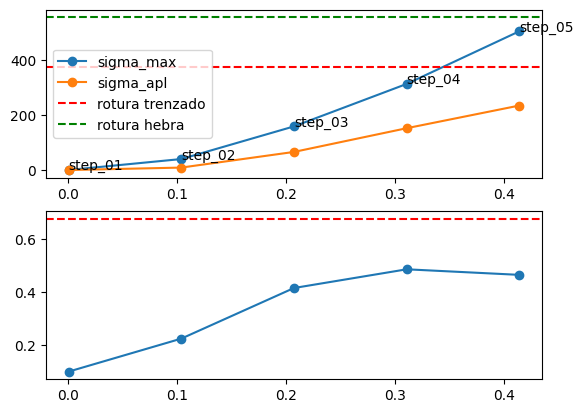

In [98]:
plt.subplot(2,1,1)

plt.plot(epsilon,sigma_max,label="sigma_max",marker="o")
plt.plot(epsilon,sigma_apl,label="sigma_apl",marker="o")

#  MPa rotura trenzado 
# horizontal line
plt.axhline(y=sigma_trenzado, color='r', linestyle='--',label="rotura trenzado")
# MPa rotura hebra
plt.axhline(y=sigma_hebra, color='g', linestyle='--',label="rotura hebra")
for i,isteps in enumerate(step_str_uq):
    plt.text(epsilon[i], sigma_max[i], str(isteps))
plt.legend()


plt.subplot(2,1,2)
ratios = [ isigma_apl/isigma_max for isigma_max,isigma_apl in zip(sigma_max,sigma_apl)]

plt.plot(epsilon,ratios,label="ratios",marker="o")
#expected ratio
plt.axhline(y=ratio, color='r', linestyle='--',label="ratio")

In [99]:
F_trenzado_kg

172.667

In [100]:
Ftotal

array([3.54931331e-03, 2.20902783e+00, 1.62881024e+01, 3.76143542e+01,
       5.80021421e+01])

In [101]:
angle = 85
ctheta = np.sin(np.deg2rad(angle))
Ftotal_correrted = Ftotal*((64*ctheta+Nalma)/64*ctheta)

In [102]:
Ftotal_correrted

array([4.35105708e-03, 2.70801852e+00, 1.99673732e+01, 4.61109481e+01,
       7.11040724e+01])

In [113]:
((64*ctheta+Nalma)/64*ctheta)

1.225887008871357

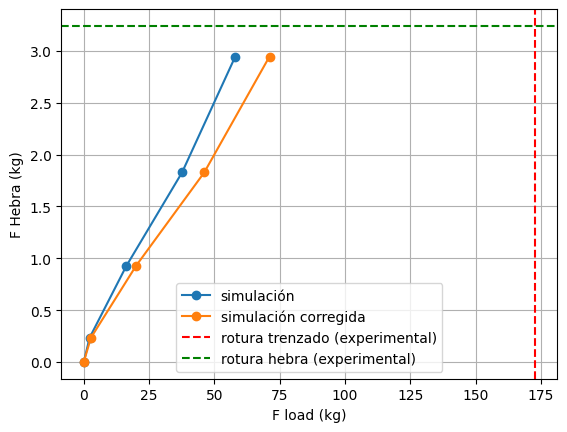

In [111]:
# linear regression

# sigma_max = a*sigma_apl + b
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(sigma_apl,sigma_max)
# linear regression
sigma_apl_fit = np.linspace(0,500,100)
sigma_max_fit = intercept + slope*sigma_apl_fit
# plt.plot(sigma_apl_fit,sigma_max_fit,label="fit",marker="none")

Fmax =  sigma_max*A_hebra/9.81
plt.plot(Ftotal,Fmax,label="simulación",marker="o")

plt.plot(Ftotal_correrted,Fmax,label="simulación corregida",marker="o")
#horizontal line
plt.axvline(x=F_trenzado_kg, color='r', linestyle='--',label="rotura trenzado (experimental)")
#homogenized
# plt.axvline(x=sigma_trenzado_homogenized, color='b', linestyle='--',label="rotura trenzado (homogenized)")
#horizontal line
plt.axhline(y=F_hebra_kg, color='g', linestyle='--',label="rotura hebra (experimental)")
#
plt.ylabel("F Hebra (kg)")
plt.xlabel("F load (kg)")
plt.grid()
plt.legend()

In [112]:
Nalma

15

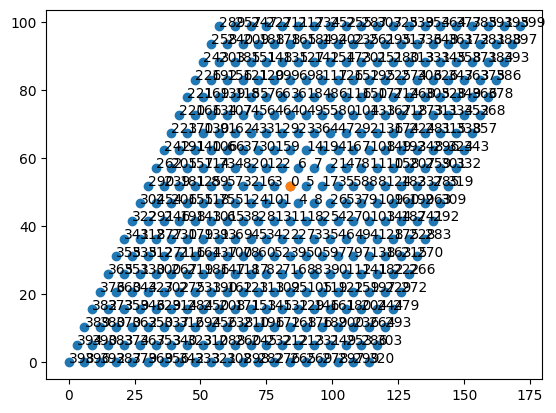

In [35]:
import numpy as np
import matplotlib.pyplot as plt
# basis hexagonal 

d = 3
a = [1,0]
b = [1/2,np.sqrt(3)/2]
a = np.array(a)*d*2
b = np.array(b)*d*2


Na = 20
Nb = 20

def plotcircle(x,y,r):
    t = np.linspace(0,2*np.pi,100)
    
    xp = x + r*np.cos(t)
    yp = y + r*np.sin(t)
    plt.plot(xp,yp)
    
    return [xp,yp]

points = []
for i in range(Na):
    for j in range(Nb):
        points.append([i*a[0] + j*b[0],i*a[1] + j*b[1]])

points = np.array(points) 

plt.plot(points[:,0],points[:,1],"o")


rmu = points.mean(axis=0)
## search for the closest point
rmu_dist = np.linalg.norm(points-rmu,axis=1)
rmu = points[np.argmin(rmu_dist)]

distances = []
for i in range(len(points)):
        distances.append(np.linalg.norm(points[i]-rmu))
##

distances = np.array(distances)

# sort points by distance
points = points[distances.argsort()]

plt.plot(rmu[0],rmu[1],"o")

for i in range(len(points)):
    plt.text(points[i][0],points[i][1],str(i))


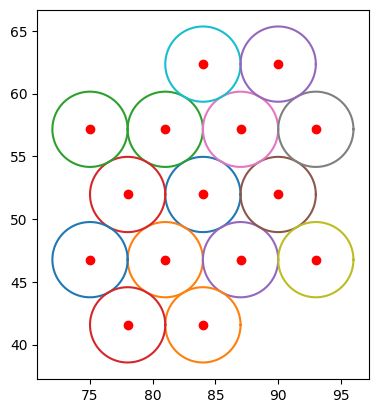

In [36]:
Nhilos = 15
for i in range(Nhilos):
    plt.plot(points[i][0],points[i][1],"r",marker="o")
    plotcircle(points[i][0],points[i][1],d)
# aspect ratio 
plt.gca().set_aspect('equal', adjustable='box')